### Coder une fonction qui calcul une approximation de la dérivé et la tester

In [1]:
def xcarre(x):
    return x**2

In [2]:
def deux_x(x):
    return x*2

In [3]:
def approximation_derive(function, x) :
    h = 0.00000001
    return (function(x+h) - function(x))/h

approximation_derive(xcarre, 6)

12.000000282341716

### Générer une liste de 100 points entre 0 et 99 avec 2x(x) et derive(function, x) la plotter sur deux graphes différents pour les comparer (ils doivent être identiques

In [4]:
#créations des x
x = list(range(0, 100, 1))

In [5]:
#création des y
y_aprox = [approximation_derive(xcarre, num) for num in x]  

In [6]:
y_deux_x = [deux_x(num) for num in x]

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'approximation_derive')

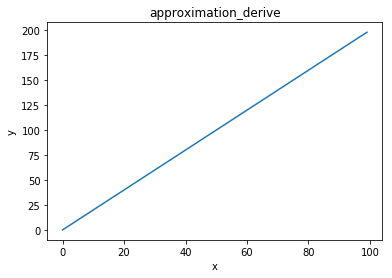

In [8]:
plt.plot(x, y_aprox)
plt.xlabel("x")
plt.ylabel("y")
plt.title("approximation_derive")

Text(0.5, 1.0, 'deux_x')

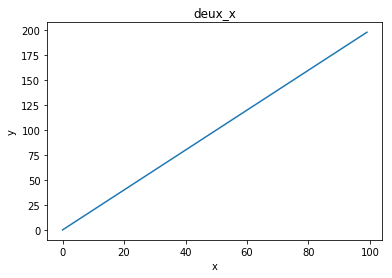

In [9]:
plt.plot(x, y_deux_x)
plt.xlabel("x")
plt.ylabel("y")
plt.title("deux_x")

# Classe house_prices

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Le minimum de votre class AutoML  :

prétraitement  
reduction de la taille de votre dataset (float64 => float32, object => category etc.)
   - sur les variables catégoriques :
        - gestion des nan
        - label encoder
   - sur les variables numériques:
        - gestion des nan
        - normalisation
        
prediction : 
   - détecter automatiquement si c'est un problème de classification ou de régression
   - en fonction, utiliser les algos appropriés 
   - ressortir les performances du modèle
   
get_ypred('test.csv') : 
     return ypred

save_ypred('test.csv') => sauvegarde le fichier de prediction prêt à être soumis sur kaggle

auto_data = AutoML('data.csv', y = 'price')

auto_data.X #retourn un X qui a été prétraité

auto_data.y   # retourn le y

auto_data.predict()

auto_data.get_ypred('test.csv')

save_ypred.get_ypred('test.csv')

In [11]:
df = pd.read_csv("train_house_prices.csv")

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df.isna().sum()

#pour avoir le % des nan
#df.isna().sum()/len(house)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

## classe

In [124]:
class AutoML:
    def __init__(self, csv, variable_a_predire='SalePrice'):
        self.df = pd.read_csv(csv)
        self.variable_a_predire = variable_a_predire

#fonction pour changer les types pour utiliser moins d'espace
    
    def change_type(self):
        for index in df:
            if self.df[index].dtypes == "float64":
                self.df[index] = df[index].astype("float32")
            if self.df[index].dtypes == "int64":
                self.df[index] = df[index].astype("int32")
            if self.df[index].dtypes == "object":
                self.df[index] = df[index].astype("category")
        return self.df

#enlève les colonnes qui ont plus de 20% de nan
    
    def nan(self):
        self.df.dropna(axis='columns', thresh=0.8 * len(self.df), inplace= True)
        for column in self.df.columns:
            if self.df[column].dtypes == "object":
                self.df[column].fillna(method = "ffill", inplace= True)
        return self.df.fillna(self.df.mean(), inplace= True)
    
#label encoder ou get dummies

    def label_encoder(self):
        self.df = pd.get_dummies(self.df, drop_first=True)
        return self.df
    
#normalisation de toutes les colonnes

    def normalisation(self):
        X = self.df.drop(columns= self.variable_a_predire)
        y = self.df[self.variable_a_predire]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.25, random_state=0) 
        sc = StandardScaler()
        self.X_train = sc.fit_transform(self.X_train)
        self.X_test = sc.transform(self.X_test)
        return self.X_train, self.X_test, self.y_train, self.y_test
    
#prédiction regression
    
    def modele(self):
        regressor = LinearRegression()
        regressor.fit(self.X_train, self.y_train)
        self.y_pred = regressor.predict(self.X_test)
        return self.y_pred

#performance du modèle

    def performance_modele(self):
        MSE = metrics.mean_squared_error(self.y_test, self.y_pred)
        RMSE = np.sqrt(metrics.mean_squared_error(self.y_test, self.y_pred))
        R2 = metrics.r2_score(self.y_test, self.y_pred)
        print(f"MSE : {MSE}, RMSE : {RMSE}, R2 : {R2}")


In [126]:
tintin = AutoML("train_house_prices.csv")
tintin.nan()
tintin.label_encoder()
tintin.normalisation()
tintin.X_train
tintin.modele()
tintin.performance_modele()

MSE : 2.8896268801879075e+31, RMSE : 5375524979188458.0, R2 : -4.3769513786393467e+21


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


## Prétraitement

### reduction de la taille de votre dataset (float64 => float32, object => category etc.)

In [15]:
def change_type(df):
    for index in df:
        if df[index].dtypes == "float64":
            df[index] = df[index].astype("float32")
        if df[index].dtypes == "int64":
            df[index] = df[index].astype("int32")
        if df[index].dtypes == "object":
            df[index] = df[index].astype("category")
    return df

change_type(df).dtypes        

Id                  int32
MSSubClass          int32
MSZoning         category
LotFrontage       float32
LotArea             int32
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int32
OverallCond         int32
YearBuilt           int32
YearRemodAdd        int32
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float32
ExterQual        category
ExterCond        category
Foundation       category
                   ...   
BedroomAbvGr        int32
KitchenAbvGr        int32
KitchenQual      category
TotRmsAbvGrd        int32
Functional       category
Fireplaces          int32
FireplaceQu      category
GarageType  

### sur les variables catégoriques et numériques :

- gestion des nan

In [41]:
df = pd.read_csv("train_house_prices.csv")

def nan(df):
    df.dropna(axis='columns', thresh=0.8 * len(df), inplace= True)
    for column in df.columns:
        if df[column].dtypes == "object":
            df[column].fillna(method = "ffill", inplace= True)
    return df.fillna(df.mean(), inplace= True)

nan(df)

In [42]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


- label encoder

In [60]:
def label_encoder(df):
    #df.select_dtypes(include= 'category') pour séparer les variables categoriques
    df = pd.get_dummies(df, drop_first=True)
    return df

label_encoder(df)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
5,6,50,85.000000,14115,5,5,1993,1995,0.0,732,...,0,0,0,0,1,0,0,0,1,0
6,7,20,75.000000,10084,8,5,2004,2005,186.0,1369,...,0,0,0,0,1,0,0,0,1,0
7,8,60,70.049958,10382,7,6,1973,1973,240.0,859,...,0,0,0,0,1,0,0,0,1,0
8,9,50,51.000000,6120,7,5,1931,1950,0.0,0,...,0,0,0,0,1,0,0,0,0,0
9,10,190,50.000000,7420,5,6,1939,1950,0.0,851,...,0,0,0,0,1,0,0,0,1,0


In [61]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


- normalisation

In [66]:
variable_a_predire = "SalePrice"
def normalisation(df):
    X = df.drop(columns= variable_a_predire)
    y = df[variable_a_predire]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = normalisation(df)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [67]:
X_train

array([[ 1.32611814,  0.31760564, -0.46969939, ..., -0.1007353 ,
         0.45381399, -0.30286107],
       [ 0.67644002,  0.55467325,  0.01117613, ..., -0.1007353 ,
         0.45381399, -0.30286107],
       [ 1.13880218,  0.55467325,  0.01117613, ..., -0.1007353 ,
         0.45381399, -0.30286107],
       ...,
       [ 1.14591545,  0.79174085, -0.08691132, ..., -0.1007353 ,
         0.45381399, -0.30286107],
       [-0.41188939,  1.50294367,  0.01117613, ..., -0.1007353 ,
         0.45381399, -0.30286107],
       [-0.11550338,  0.08053804, -0.56539641, ..., -0.1007353 ,
         0.45381399, -0.30286107]])

## Prédiction

In [96]:
def modele(X_train ,X_test, y_train):
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    return y_pred

y_pred = modele(X_train ,X_test, y_train)

- performance du modèle

In [122]:
def performance_modele(y_pred, y_test):
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = metrics.r2_score(y_test, y_pred)
    print(f"MSE : {MSE}, RMSE : {RMSE}, R2 : {R2}")
                                                     
performance_modele(y_pred, y_test)

MSE : 2.8896268801879075e+31, RMSE : 5375524979188458.0, R2 : -4.3769513786393467e+21


In [121]:
y_pred

array([ 2.76786721e+05,  1.41263561e+05,  1.11649975e+05,  2.10965984e+05,
        9.85862624e+04,  7.74888473e+04,  2.63814749e+05,  1.31237445e+05,
        5.36217092e+05,  1.51626687e+05,  2.06005679e+05,  1.18590656e+14,
        2.39163787e+05,  1.11848883e+05,  1.09119557e+05,  1.43283920e+05,
        2.50304965e+05,  1.28345295e+05,  1.47396749e+05,  1.68623069e+05,
        1.31724512e+05,  1.87381320e+05,  1.12895257e+05,  1.52369706e+05,
        1.90530515e+05,  1.47290586e+05,  1.65709525e+05,  6.09107487e+04,
        3.36647872e+05,  1.13682128e+05,  1.44634593e+05,  1.95905210e+05,
        1.46358255e+05,  2.94471360e+05,  3.49608386e+05,  2.09674057e+05,
        3.03213162e+05,  1.24207251e+05,  2.34153115e+05,  3.50100514e+05,
        2.02354423e+05,  1.04073595e+05,  1.98257593e+05,  3.01541451e+05,
        3.67799998e+05,  1.37787653e+05,  1.63561092e+14,  1.35877057e+05,
        1.72803319e+05,  7.00450581e+04,  3.91994458e+05,  1.41586949e+05,
        1.66823717e+05,  